In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pylab
from numpy import arange
import math
import seaborn as sns
import scipy.stats
from scipy import signal 
import time

In [4]:
class Automatos:
    def __init__(self, M):
        self.matriz = np.array(M)
        self.symb = []
        self.padroes = []
    def symbols(self,S):
        self.symb = S
    def deterministic(self, inter):
        k = 0
        for i in range(inter):
            r = np.random.random_sample()
            a = 0
            for j in range(len(self.matriz)):
                a = a + self.matriz[k][j]
                if r < a:
                    self.padroes.append(self.symb[k])
                    k = j
                    break
        return self.padroes
fig1d_matrix = [
    [0.9,0.1,0,0,0,0],
    [0.882,0.098,0.02,0,0,0],
    [0,0,0.2,0.8,0,0],
    [0,0,0.194,0.776,0.03,0],
    [0,0,0,0,0.5,0.5],
    [0.01,0,0,0,0.495,0.495]
    ] #Nesse caso a matriz é para os automatos 0,1,2,3,4,5
s_fig1d = [0,1,2,3,4,5]
fig1e_matrix = [
    [0.9,0.1,0,0,0,0],
    [0.882,0.098,0.02,0,0,0],
    [0,0,0.2,0.8,0,0],
    [0,0,0.194,0.776,0.03,0],
    [0,0,0,0,0.5,0.5],
    [0.01,0,0,0,0.495,0.495]
    ] #Nesse caso a matriz é para os automatos 1 e 0
s_fig1e = [0,1,0,1,0,1]

fig1d = Automatos(fig1d_matrix)
fig1d.symbols(s_fig1d)
padroes_fig1d = fig1d.deterministic(200)

fig1e = Automatos(fig1e_matrix)
fig1e.symbols(s_fig1e)
padroes_fig1e = fig1e.deterministic(200)

#print(padroes_fig1d)
#print(padroes_fig1e)

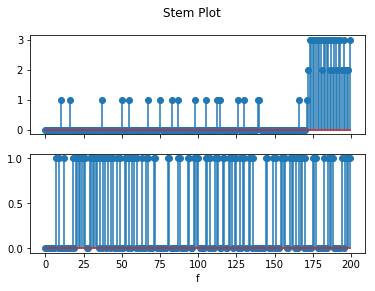

In [5]:
marks_fig1d = np.arange(len(padroes_fig1d))
fig, (x1, x2) = plt.subplots(2, sharex = True)
x1.stem(marks_fig1d, padroes_fig1d)
x2.stem(marks_fig1d, padroes_fig1e)
plt.suptitle('Stem Plot')
plt.xlabel('f')
plt.show()

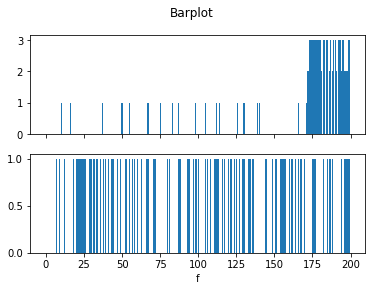

In [6]:
fig, (x1, x2) = plt.subplots(2, sharex = True)

x = np.arange(len(padroes_fig1d))
x1.bar(x, padroes_fig1d)
x2.bar(x, padroes_fig1e)

plt.suptitle('Barplot')
plt.xlabel('f')

plt.show()

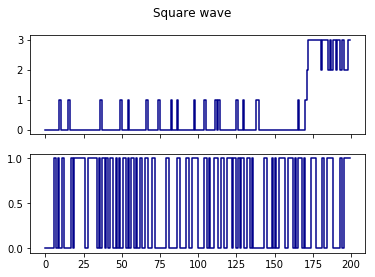

In [7]:
from numpy import arange
fig, (x1, x2) = plt.subplots(2, sharex = True)

plt.suptitle("Square wave")
x1.step(arange(0,len(padroes_fig1d)),padroes_fig1d, color = 'darkblue')
x2.step(arange(0,len(padroes_fig1e)),padroes_fig1e, color = 'darkblue')
plt.show()

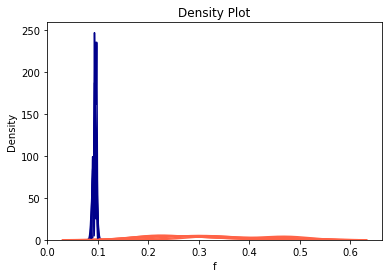

In [16]:
def freq(automato, symbol):
    automato = np.array(automato)
    c = 0
    for i in automato: 
        if i==symbol: 
            c +=1
    return c/len(automato)

freq_fig6d1 = []
freq_fig6d2 = []
freq_fig6d3 = []
freq_fig6d4 = []
freq_fig6d5 = []
freq_fig6e = []

k = fig1d.deterministic(2000)
p = fig1e.deterministic(2000)

for i in range(200,2000,200):
    freq_fig6d1.append(freq(k[:i],1))
    freq_fig6d2.append(freq(k[:i],2))
    freq_fig6d3.append(freq(k[:i],3))
    freq_fig6d4.append(freq(k[:i],4))
    freq_fig6d5.append(freq(k[:i],5))
    freq_fig6e.append(freq(p[:i],1))
    sns.distplot(freq_fig6d1, hist = False, kde = True, color = 'darkblue')
    #sns.distplot(freq_fig6d2, hist = False, kde = True, color = 'peru')
    #sns.distplot(freq_fig6d3, hist = False, kde = True, color = 'darkorange')
    #sns.distplot(freq_fig6d4, hist = False, kde = True, color = 'darkmagenta')
    #sns.distplot(freq_fig6d5, hist = False, kde = True, color = 'lime')
    sns.distplot(freq_fig6e, hist = False, kde = True, color = 'tomato')
    
plt.xlabel('f')
plt.ylabel('Density')
plt.title('Density Plot')
plt.show()

In [74]:
#import math

#media = np.mean(padroes_fig1d)
#desvio = np.std(padroes_fig1d)

#def probability_density(x):
#    pdf = (1/(desvio*math.sqrt(2*math.pi)))*math.exp((-1/2)*((x-media)/desvio)**2)
#    return pdf
#k = []
#for i in range(inter):
#    k.append(probability_density(padroes_fig1d[i]))